In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [3]:
df = pd.read_csv('../data/csv/Movimento dei clienti negli esercizi ricettivi per tipo di esercizio - mensili (IT1,122_54_DF_DCSC_TUR_3,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_3(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_3(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_3(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_3(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_3(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
replacement_dict = {
    'ITC1': 'PIEMONTE',
    'ITC2': 'VALLE D\'AOSTA',
    'ITC3': 'LIGURIA',
    'ITC4': 'LOMBARDIA',
    'ITD3': 'VENETO',
    'ITD4': 'FRIULI',
    'ITD5': 'EMILIA',
    'ITDA': 'TRENTINO',
    'ITE1': 'TOSCANA',
    'ITE2': 'UMBRIA',
    'ITE3': 'MARCHE',
    'ITE4': 'LAZIO',
    'ITF1': 'ABRUZZO',
    'ITF2': 'MOLISE',
    'ITF3': 'CAMPANIA',
    'ITF4': 'PUGLIA',
    'ITF5': 'BASILICATA',
    'ITF6': 'CALABRIA',
    'ITG1': 'SICILIA',
    'ITG2': 'SARDEGNA'
}
df['REF_AREA'] = df['REF_AREA'].replace(replacement_dict)

In [5]:
arrivals_per_region = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['REF_AREA'] != 'IT') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['TYPE_ACCOMMODATION'] == 'ALL')]
arrivals = arrivals_per_region[['REF_AREA', 'OBS_VALUE', 'TIME_PERIOD']]
regions = arrivals['REF_AREA'].unique()
years = arrivals['TIME_PERIOD'].unique()

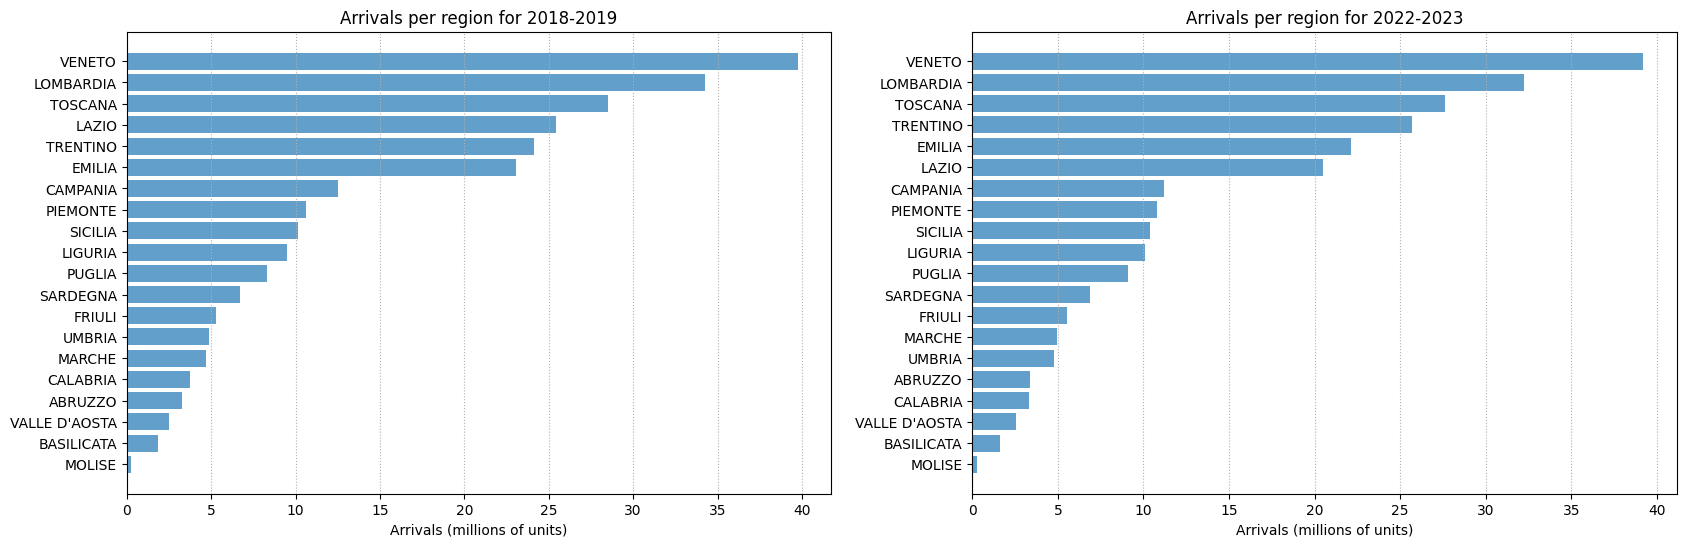

In [6]:
arrivals_2018_2019 = arrivals[arrivals['TIME_PERIOD'].isin(['2018', '2019'])].groupby('REF_AREA')['OBS_VALUE'].sum().sort_values()
arrivals_2022_2023 = arrivals[arrivals['TIME_PERIOD'].isin(['2022', '2023'])].groupby('REF_AREA')['OBS_VALUE'].sum().sort_values()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 6))

ax1.barh(arrivals_2018_2019.index, arrivals_2018_2019.values, label='2018-2019', alpha=0.7)
ax2.barh(arrivals_2022_2023.index, arrivals_2022_2023.values, label='2022-2023', alpha=0.7)

ax1.set_xlabel('Arrivals (millions of units)')
ax1.set_title('Arrivals per region for 2018-2019')
ax1.grid(True, axis='x', linestyle=':')

ax2.set_xlabel('Arrivals (millions of units)')
ax2.set_title('Arrivals per region for 2022-2023')
ax2.grid(True, axis='x', linestyle=':')

plt.show()

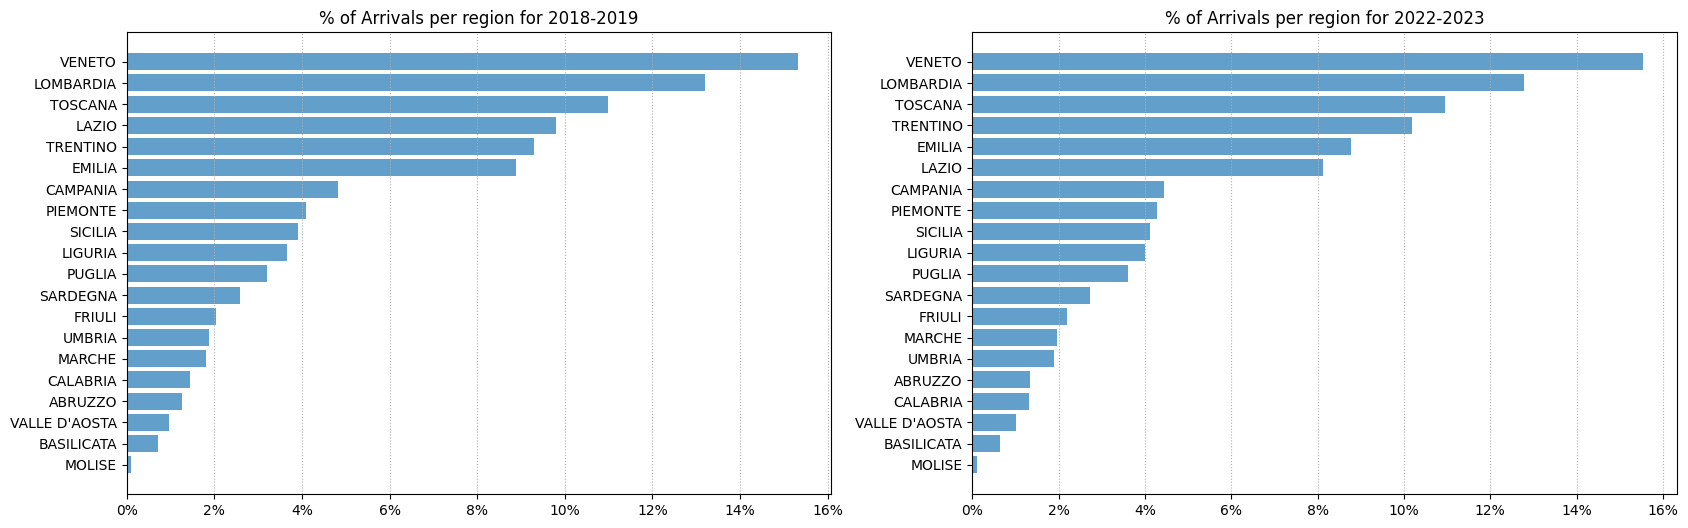

In [7]:
arrivals_2018_2019_unsorted = arrivals[arrivals['TIME_PERIOD'].isin(['2018', '2019'])].groupby('REF_AREA')['OBS_VALUE'].sum()
arrivals_2022_2023_unsorted = arrivals[arrivals['TIME_PERIOD'].isin(['2022', '2023'])].groupby('REF_AREA')['OBS_VALUE'].sum()

arrivals_2018_2019_perc = (arrivals_2018_2019_unsorted / arrivals_2018_2019_unsorted.sum() * 100).sort_values()
arrivals_2022_2023_perc = (arrivals_2022_2023_unsorted / arrivals_2022_2023_unsorted.sum() * 100).sort_values()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 6))

ax1.barh(arrivals_2018_2019_perc.index, arrivals_2018_2019_perc.values, label='2018-2019', alpha=0.7)
ax2.barh(arrivals_2022_2023_perc.index, arrivals_2022_2023_perc.values, label='2022-2023', alpha=0.7)

ax1.set_title('% of Arrivals per region for 2018-2019')
ax1.grid(True, axis='x', linestyle=':')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

ax2.set_title('% of Arrivals per region for 2022-2023')
ax2.grid(True, axis='x', linestyle=':')
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.show()

C:\Users\Davide\AppData\Local\Temp\ipykernel_12848\1404483603.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(labels)


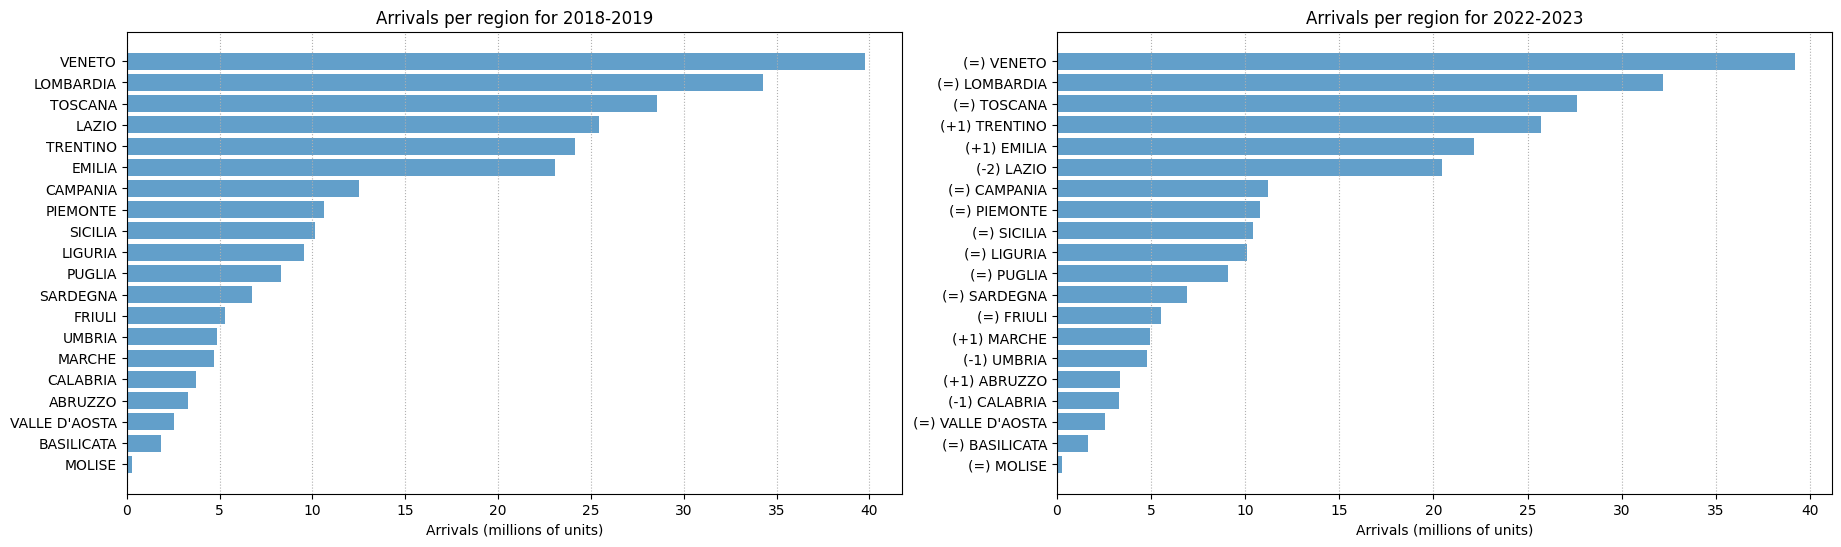

In [8]:
rank_pre = arrivals_2018_2019.rank(ascending=False)
rank_post = arrivals_2022_2023.rank(ascending=False)
rank_change = rank_pre.reindex(rank_post.index) - rank_post

def get_label(str):
  if str > 0:
    return f"(+{int(str)})"
  if str < 0:
    return f"({int(str)})"
  return "(=)"
labels = [f"{get_label(change)} {region}" for region, change in rank_change.items()]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(22, 6))

ax1.barh(arrivals_2018_2019.index, arrivals_2018_2019.values, label='2018-2019', alpha=0.7)
ax2.barh(arrivals_2022_2023.index, arrivals_2022_2023.values, label='2022-2023', alpha=0.7)

ax1.set_xlabel('Arrivals (millions of units)')
ax1.set_title('Arrivals per region for 2018-2019')
ax1.grid(True, axis='x', linestyle=':')

ax2.set_xlabel('Arrivals (millions of units)')
ax2.set_title('Arrivals per region for 2022-2023')
ax2.set_yticklabels(labels)
ax2.grid(True, axis='x', linestyle=':')

plt.show()

C:\Users\Davide\AppData\Local\Temp\ipykernel_12848\2022794303.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(labels)


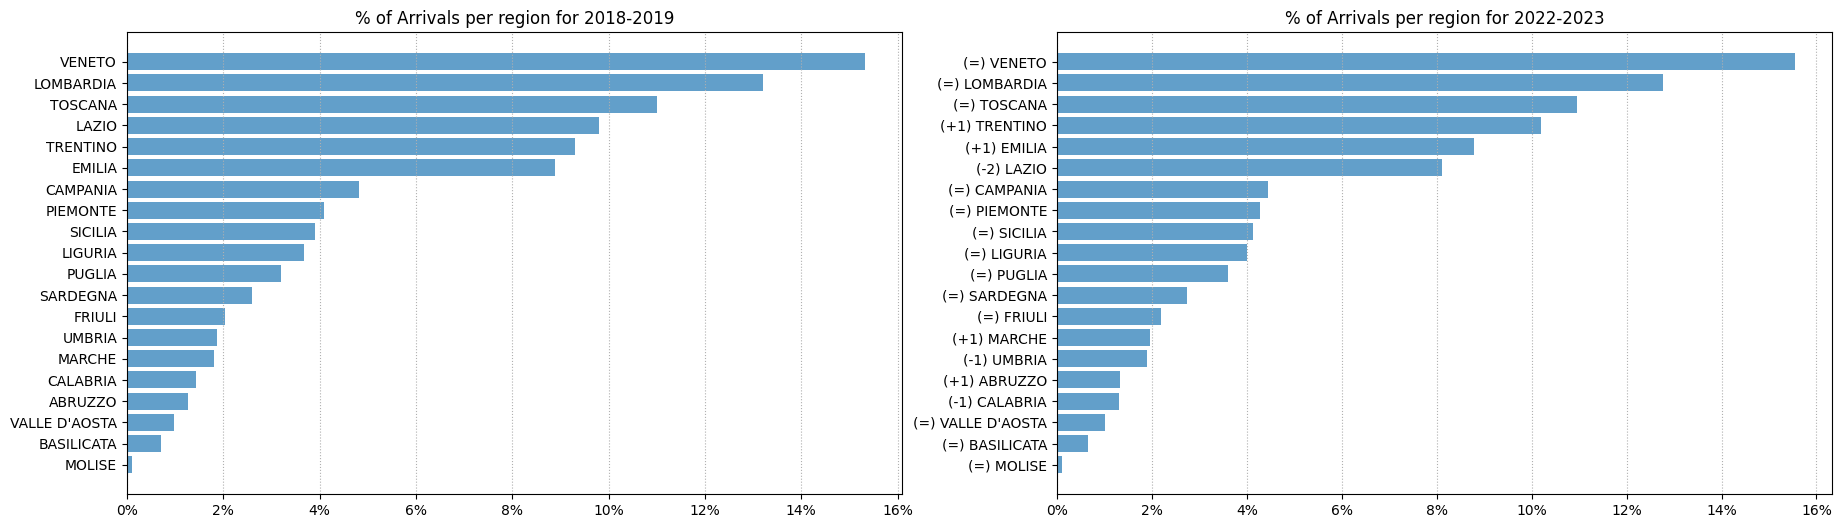

In [9]:
rank_pre = arrivals_2018_2019_perc.rank(ascending=False)
rank_post = arrivals_2022_2023_perc.rank(ascending=False)
rank_change = rank_pre.reindex(rank_post.index) - rank_post

def get_label(str):
  if str > 0:
    return f"(+{int(str)})"
  if str < 0:
    return f"({int(str)})"
  return "(=)"
labels = [f"{get_label(change)} {region}" for region, change in rank_change.items()]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(22, 6))

ax1.barh(arrivals_2018_2019_perc.index, arrivals_2018_2019_perc.values, label='2018-2019', alpha=0.7)
ax2.barh(arrivals_2022_2023_perc.index, arrivals_2022_2023_perc.values, label='2022-2023', alpha=0.7)

ax1.set_title('% of Arrivals per region for 2018-2019')
ax1.grid(True, axis='x', linestyle=':')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

ax2.set_title('% of Arrivals per region for 2022-2023')
ax2.set_yticklabels(labels)
ax2.grid(True, axis='x', linestyle=':')
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.show()

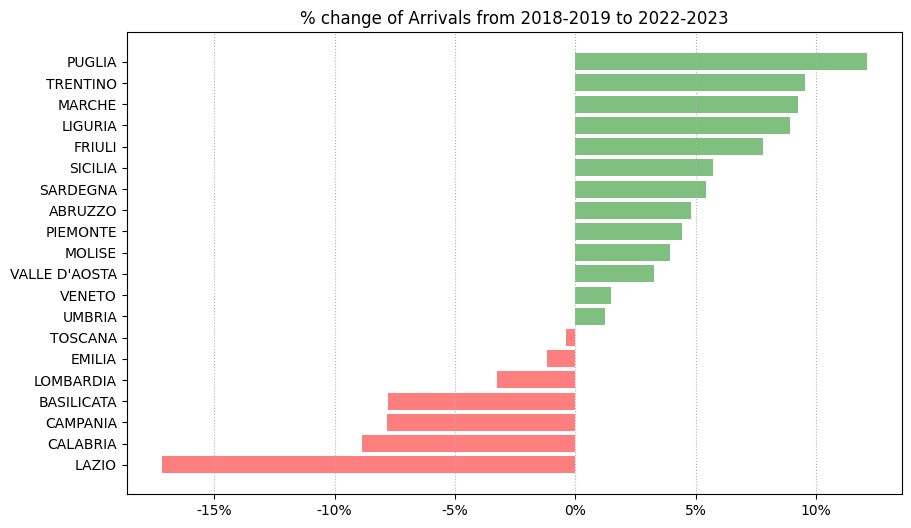

In [23]:
percentage_change = ((arrivals_2022_2023_perc - arrivals_2018_2019_perc) / arrivals_2018_2019_perc * 100).sort_values()
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(negative_change.index, negative_change.values, color='red', alpha=0.5)
ax.barh(positive_change.index, positive_change.values, color='green', alpha=0.5)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.title("% change of Arrivals from 2018-2019 to 2022-2023")
plt.grid(True, axis='x', linestyle=':')
plt.show()

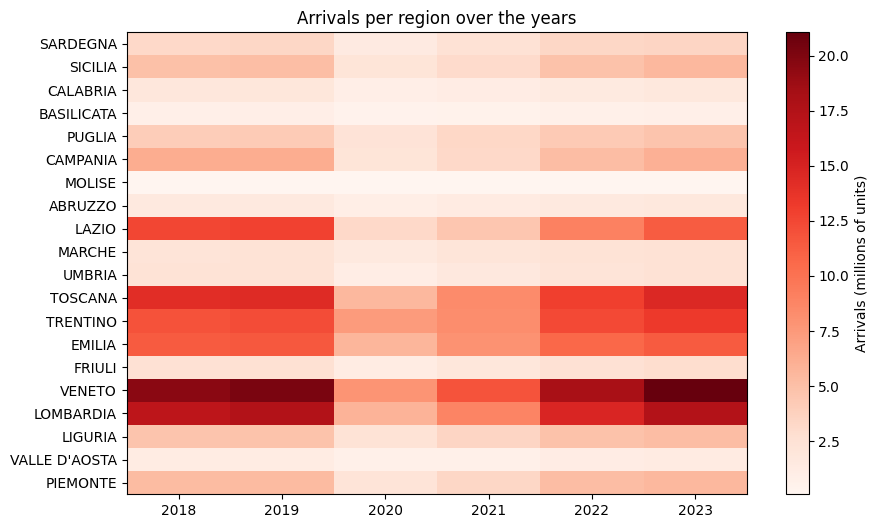

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

matrix = np.zeros((len(regions), len(years)))

for i, region in enumerate(regions):
  for j, year in enumerate(years):
    value = arrivals[(arrivals['REF_AREA'] == region) & (arrivals['TIME_PERIOD'] == year)]['OBS_VALUE']
    if not value.empty:
      matrix[i, j] = value.values[0]

c = ax.pcolormesh(years, regions, matrix, cmap='Reds')
fig.colorbar(c, ax=ax, label="Arrivals (millions of units)")

plt.title("Arrivals per region over the years")
plt.show()

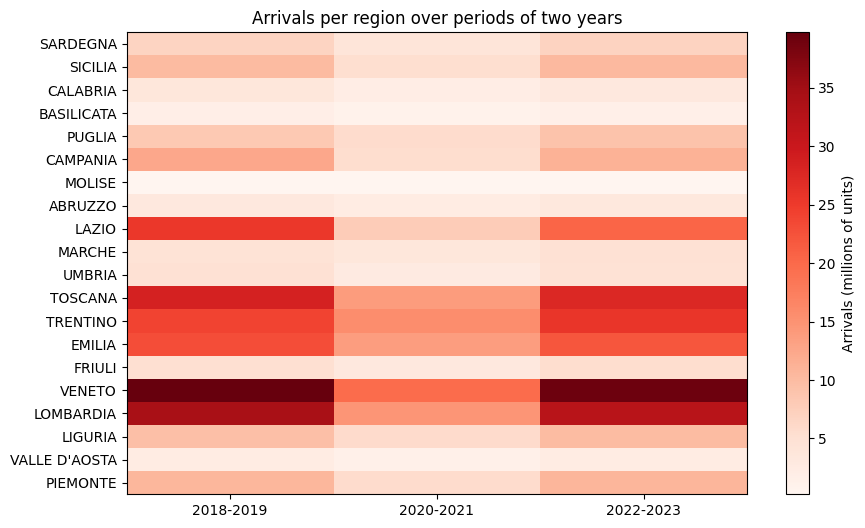

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

grouped_years = [years[i:i+2] for i in range(0, len(years), 2)]
grouped_year_labels = [f"{group[0]}-{group[-1]}" for group in grouped_years]

matrix = np.zeros((len(regions), len(grouped_years)))

for i, region in enumerate(regions):
  for j, group in enumerate(grouped_years):
    value = arrivals[(arrivals['REF_AREA'] == region) & (arrivals['TIME_PERIOD'].isin(group))]['OBS_VALUE'].sum()
    matrix[i, j] = value

c = ax.pcolormesh(grouped_year_labels, regions, matrix, cmap='Reds')
fig.colorbar(c, ax=ax, label="Arrivals (millions of units)")

plt.title("Arrivals per region over periods of two years")
plt.show()

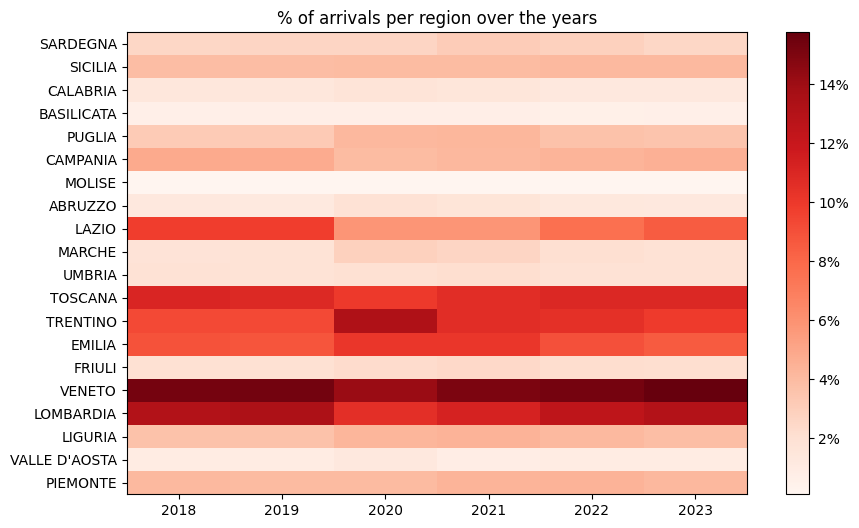

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

matrix = np.zeros((len(regions), len(years)))

for i, region in enumerate(regions):
  for j, year in enumerate(years):
    arrivals_year = arrivals[arrivals['TIME_PERIOD'] == year]
    arrivals_year_region = arrivals_year[(arrivals_year['REF_AREA'] == region)]['OBS_VALUE']
    value = arrivals_year_region / arrivals_year['OBS_VALUE'].sum() * 100
    if not value.empty:
      matrix[i, j] = value.values[0]

c = ax.pcolormesh(years, regions, matrix, cmap='Reds')
colorbar = fig.colorbar(c, ax=ax)
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.title("% of arrivals per region over the years")
plt.show()

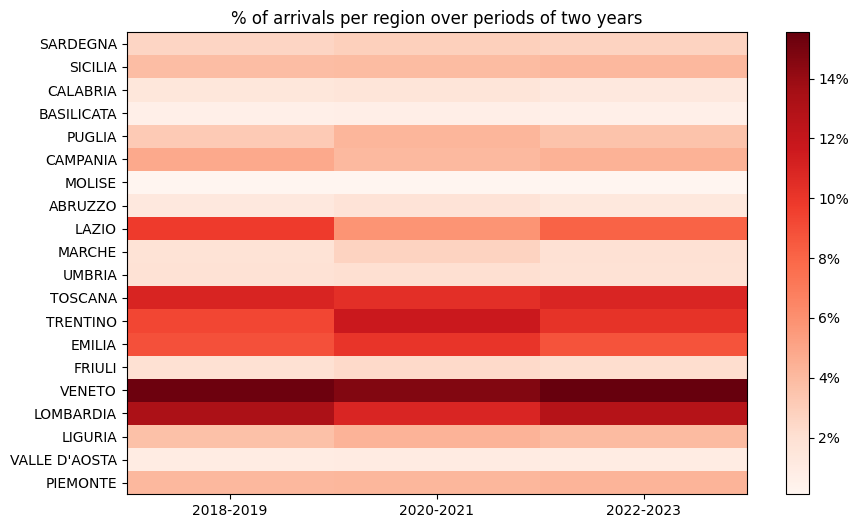

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

grouped_years = [years[i:i+2] for i in range(0, len(years), 2)]
grouped_year_labels = [f"{group[0]}-{group[-1]}" for group in grouped_years]

matrix = np.zeros((len(regions), len(grouped_years)))

for i, region in enumerate(regions):
  for j, group in enumerate(grouped_years):
    arrivals_years = arrivals[arrivals['TIME_PERIOD'].isin(group)].sum()
    arrivals_years_region = arrivals[(arrivals['REF_AREA'] == region) & (arrivals['TIME_PERIOD'].isin(group))]['OBS_VALUE'].sum()
    value = arrivals_years_region / arrivals_years['OBS_VALUE'].sum() * 100
    matrix[i, j] = value

c = ax.pcolormesh(grouped_year_labels, regions, matrix, cmap='Reds')
colorbar = fig.colorbar(c, ax=ax)
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.title("% of arrivals per region over periods of two years")
plt.show()